## Bibliotecas e módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções implementadas

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

In [5]:
#Normaliza dados------------------------------------------------
def norm_data(data):
    val = []
    for i in range(data.shape[0]):
        val.append( np.linalg.norm( data[i,:] ) )

    fator = val[ np.argmax(val) ]
    data /= fator
    return data

#Normaliza pesos/mapa------------------------------------------
def norm_map(Map):
    val = []
    for i in range(Map.shape[1]):
        for j in range(Map.shape[2]):
            val.append( np.linalg.norm( Map[:,i,j] ) )

    fator = val[ np.argmax(val) ]
    Map /= fator
    return Map

#Verifica o neurônio mais próximo/similar_----------------------
def neuro_win(x,Map,L):
    cost = np.infty
    wx,wy = 0,0
    for i in range(L):
        for j in range(L):
            dif = np.linalg.norm( x - Map[:,i,j] )
            if dif < cost:
                cost = dif
                wx,wy = i,j
    return wx,wy

#Atualização dos pesos do mapa de neurônios----------------------
def update_map(pos,L,x,Map,eta,sig):
    upMap = np.copy(Map)
    for i in range(L):
        for j in range(L):
            alpha = neigh_rate(pos,[i,j],sig)
            upMap[:,i,j] = Map[:,i,j] + eta*alpha*(x - Map[:,i,j])
    upMap = norm_map(upMap)
    return upMap

#Função para ponderação do ajuste na vizinhança-----------------
def neigh_rate(pos1,pos2,sig):
    return np.exp( -(np.linalg.norm(np.array((pos1))-np.array((pos2)))**2)/(2*(sig**2)) )

#Função para associação padrão-agrupamento----------------------
def map_decision(x,Map,clusterMap,L):
    ind = []
    for k in range(x.shape[0]):
        i,j = neuro_win(x[k,:],Map,L)
        ind.append( clusterMap[i,j] )
    return ind

## Simulação dos dados (o mesmo de exemplos anteriores)

In [6]:
np.random.seed(2)
agrupamentos = 4
x, y = make_blobs(n_features=2, centers=agrupamentos, n_samples=200)

## Ajuste do SOM

In [7]:
#--------------------------------------------
L = 10          #Largura do mapa de neurônios
sig = 1.0       #Parâmetros sigma usado na fun. viz. topológica
eta = 1.0       #Taxa de aprendizado
epsilon = 0.001 #Tolerância para detecção de convergência
#----------

m,n  = x.shape #Número de observações/dimensões

x = norm_data(x) #Normalização dos dados

Map = np.zeros((x.shape[1],L,L)) #Gera mapa de neurônios (n x L x L)

#Inicialização aleatória dos neurônios
pos = np.argsort( np.random.randint(0,1,m) ); k = 0
for i in range(L):
    for j in range(L):
        Map[:,i,j] = x[pos[k],:]
        k += 1

epoca = 0 #Contador de época
while True:
    oldMap = np.copy(Map) #Usado para testar convergência

    #Define uma ortem aletória a cada iteração
    pos = np.argsort( np.random.randint(0,1,m) )
    xs = np.copy( x[pos,:] ) #Cópia 'desordenada' do conjunto de dados

    for i in range(m):
        pi,pj = neuro_win(xs[i,:],Map,L)
        Map = update_map([pi,pj],L,xs[i,:],Map,eta,sig)

    if np.max( np.linalg.norm( Map - oldMap ) ) < epsilon: break
    print( np.max( np.linalg.norm( Map - oldMap ) ) )

    epoca += 1
    eta = 1.0/epoca

5.61766002367637
2.027734290944641
0.7505528907043947
0.42706376323353
0.2340940133497386
0.11710420654324323
0.09037984632984354
0.0517149528929813
0.03521676315141303
0.025291372016544862
0.02242929021855588
0.01699959865917207
0.019348500454586758
0.013093526229572704
0.009911409567398005
0.007953536378353632
0.012409401205192707
0.011676836085301357
0.007878255398068383
0.005845075688174171
0.009214069225001455
0.006310800752636305
0.008642782575535447
0.006576333361859167
0.00940753455887012
0.006174024748857328
0.007767763056647227
0.00531061961379082
0.00487979695714616
0.003679645170717025
0.0029254811010426414
0.002426827325341874
0.006105013836395554
0.005021021022120217
0.006031035047832593
0.009993977461400943
0.0071444411173746105
0.005268772737116113
0.003992092799040922
0.0030985092270685594
0.0024587423561413775
0.0019922597937128
0.0016469773671652036
0.0013880552007045105
0.001191513492748692
0.0010404714778398467


## Determinação dos agrupamentos e visualização do mapa

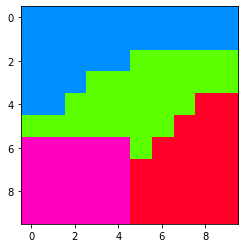

In [8]:
path_out = 'MapaSOM.png'

#Determinação do número de agrupamentos
agrupamentos = 4

coll = ['red','blue','green','magenta','orange','cyan','darkred','grey']

#Visualização do mapa/grupos
g = AgglomerativeClustering(n_clusters=agrupamentos, linkage='complete', affinity='euclidean')
agrup = g.fit( Map.reshape( (n,L*L), order='C').T )
clusterMap = np.reshape( agrup.labels_ , (L,L) )

plt.imshow(clusterMap,cmap=cm.gist_rainbow)
plt.savefig(path_out,dpi=300)
plt.show()

## Visualização da configuração final do mapa de neurônios

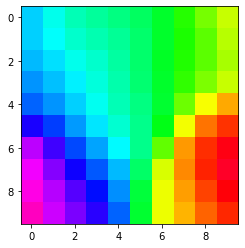

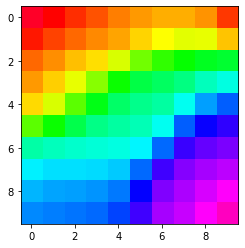

In [9]:
plt.imshow(Map[0,:,:],cmap=cm.gist_rainbow)
plt.savefig(path_out,dpi=300)
plt.show()

plt.imshow(Map[1,:,:],cmap=cm.gist_rainbow)
plt.savefig(path_out,dpi=300)
plt.show()

## Agrupamento dos dados (segundo interpretação do mapa de neurônios)

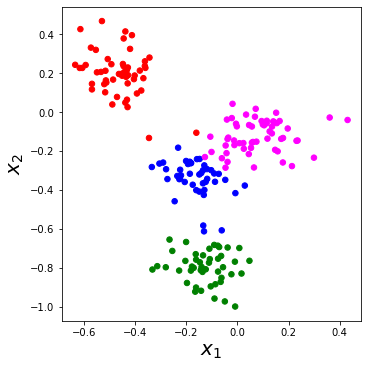

In [11]:
path_out = 'AgrupSOM.png'

#Classificação segundo o mapa obtido
res = map_decision(x,Map,clusterMap,L)

FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

coll = ['red','blue','green','magenta','orange','cyan','darkred','grey']
marr = ['o','+','^','*','D','x','p','h']

vecCol = []
for c in res: vecCol.append( coll[c] )

#Subgráfico 1 (K-Médias)
ax = fig.add_subplot(spec[0,0])
ax.scatter(x[:, 0], x[:, 1], marker='o', c=vecCol, s=30)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)

plt.savefig(path_out,dpi=300)
plt.show()